# WEATHER PROJECT PRESENTATION

## **Main goals**
   

- ### Data visualization of temperature changes through the years.
- ### Algorithm for route planning.
  

## **List of packages used** 

In [7]:
import pandas as pd
from math import cos, asin, sqrt, pi
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
import ipywidgets as widgets
from IPython.display import display

## DATASET ANALYSIS: ##

Dataset exploration

In [8]:
show = pd.read_csv('temperatures.csv')
show

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [9]:
print(show.columns)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


### The project has been divided in two main parts.

# PART ONE: graphical visualization

C:\Users\inase\AppData\Local\Temp\ipykernel_20068\3198375819.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['color'] = df_selected['AverageTemperature'].apply(self.assign_color)


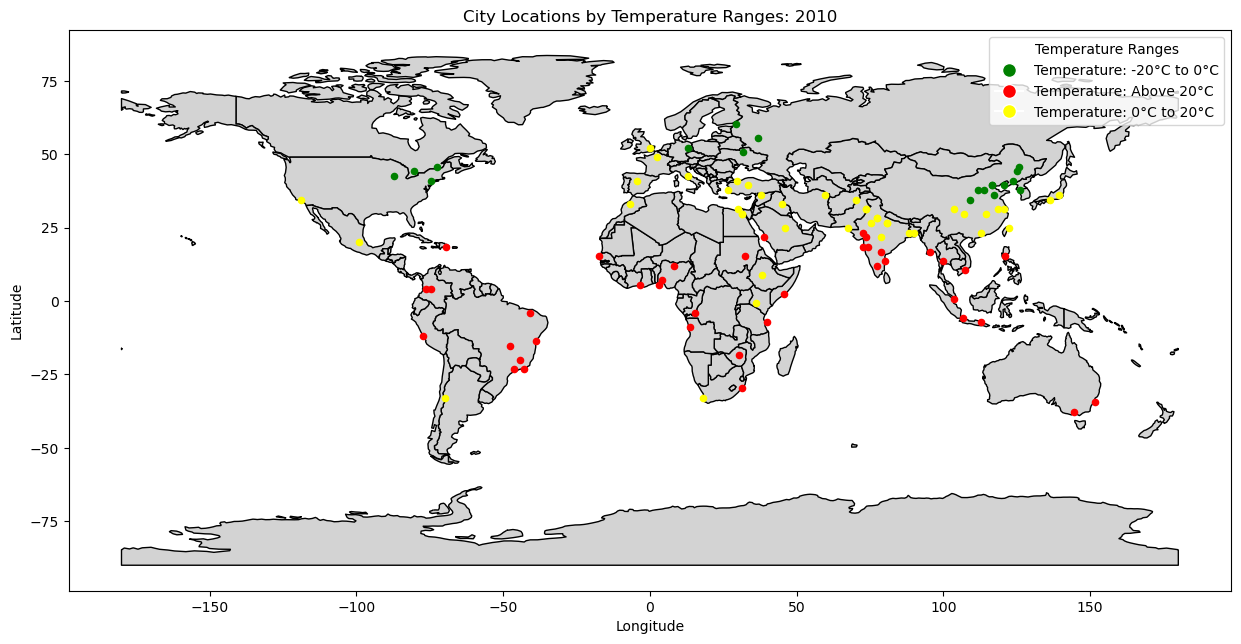

interactive(children=(Dropdown(description='Select Year:', options=(1743, 1744, 1745, 1750, 1751, 1752, 1753, …

In [14]:
# Example usage:
file_name = 'temperatures.csv'
"""
-- Documentation --
    This class is used to plan the "best" route according to the terms
"""


class RoutePlanner:
    def __init__(self, data_file):
        """
        Initialize RoutePlanner object.
        :param data_file: input dataset
        """
        self.data = self._read_data(data_file)
        self.path = []

    def _read_data(self, file):
        """
        Reading dataset and updating coordinates from string to float for plan_route()
        :param file: input dataset
        :return: returns the data with updated coordinates
        """
        df = pd.read_csv(file)
        specific_data = df[(df['dt'] >= '2010-02-01') & (df['dt'] <= '2010-02-31')]
        data = specific_data.values.tolist()

        # converting all the city coordinates
        for city in data:
            city[5] = self._convert_coordinates(city[5])
            city[6] = self._convert_coordinates(city[6])

        return data

    def _convert_coordinates(self, coord_str):
        """
        Converting coordinates from string to float
        :param coord_str: input coordinates
        :return: returns coordinates in float in order to use it in plan_route()
        """
        if coord_str is not None:
            if 'N' in coord_str or 'E' in coord_str:
                return float(coord_str[:-1])
            elif 'S' in coord_str or 'W' in coord_str:
                return -float(coord_str[:-1])
            else:
                return float(coord_str)
        else:
            return None

    def distance(self, lat1, lon1, lat2, lon2):
        """
        Calculates distance given latitude and longitude
        :param lat1: latitude first city
        :param lon1: longitude first city
        :param lat2: latitude second city
        :param lon2: longitude second city
        :return: distance between two cities
        """
        r = 6371  # km
        p = pi / 180

        a = 0.5 - cos((lat2 - lat1) * p) / 2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
        return 2 * r * asin(sqrt(a))

    def present(self, city, path):
        """
        Checks presence of a city in the path, so it avoids redundant cities and infinite loop
        excludes the city already visited
        :param city: city to check
        :param path: path already done until this point
        :return: boolean value --> True = present, False = not present
        """

        # Searching in the path if the city I want to go was already visited
        for x in path:
            # Checks the name of the city
            if city[3] == x[3]:
                return True
        return False

    def plan_route(self, start_city, end_city):
        """
        Plans the route according to the terms: search the first 3 closest cities and pick the most
        heated one among all --> does the same until destination arrival
        :param start_city: starting point
        :param end_city: ending point
        :return: best route to follow
        """

        # Default path is nothing
        self.path = []
        # Putting country as the starting city
        # I need to update it every time I visit another city
        country = start_city
        # Appends the city the first time so now I have path = [start_city]
        self.path.append(country)

        while country[3] != end_city:
            # index for searching the three closest cities
            j = 0
            # initializing as default values
            # container for the 3 closest cities
            three_closest = [0, 0, 0]
            while j < 3:
                # setting min_dist to default value
                min_dist = 10000000
                for city in self.data:
                    # I consider only non visited cities --> saving time
                    if not self.present(city, self.path):
                        # calculates distance between the current city and the ref country
                        dist = self.distance(country[5], country[6], city[5], city[6])
                        # checks if the distance is less than the current min
                        if dist < min_dist and (city not in three_closest):
                            # updates the values and appends to the three_closest
                            min_dist = dist
                            three_closest[j] = city

                j += 1

            # I have now the three closest cities
            # chooses the warmest one
            max_city = three_closest[0]
            for c in three_closest:
                # finds the warmest city
                if c[1] > max_city[1]:
                    max_city = c

            # appends to the path my new city
            self.path.append(max_city)
            # updates the ref value to this new city
            country = max_city

        return self.path

    def print_route(self):
        """
        Prints the route to dislay
        :return: nothing
        """
        print("Planning the route...")
        for x in self.path:
            print(x[3], ',', x[4])


"""
-- Documentation --
   This class is used to visualize the temperature changes through a world map
"""


class TemperatureVisualization:
    def __init__(self, data_file):
        """
        Basic setup of the data and cleaning
        :param data_file: dataset to consider
        """
        self.data = pd.read_csv(data_file)
        self.clean_data()

    def clean_data(self):
        """
        Cleaning all the dataset
        :return: data is now cleaned and organised --> ready to be used
        """

        # drops non available data
        self.data.dropna(inplace=True)
        # splitting and reformatting the rest
        self.data[['year', 'month', 'day']] = self.data['dt'].str.split("-", expand=True)
        # erasing duplicates in the subset['City','year']
        self.data = self.data.drop_duplicates(subset=['City', 'year'])
        # converting coordinates and year
        self.data['Latitude'] = self.data['Latitude'].apply(self.convert_to_decimal)
        self.data['Longitude'] = self.data['Longitude'].apply(self.convert_to_decimal)
        self.data['year'] = self.data['year'].astype(int)

    @staticmethod
    def convert_to_decimal(coord):
        """
        Converting coordinates to decimal
        :param coord: coordinates in str type
        :return: value: coordinates in float type
        """
        direction = coord[-1]
        value = float(coord[:-1])
        if direction in ['S', 'W']:
            value = -value
        return value

    def assign_color(self, temp):
        """
        Assigning color depending on the temperature ranges
        :param temp: temperature
        :return: color
        """
        if -40 < temp < -20:
            return 'blue'
        elif -20 < temp < 0:
            return 'green'
        elif 0 < temp < 20:
            return 'yellow'
        else:
            return 'red'

    def plot_cities(self, selected_year):
        """
        Shows the "points" on the map
        :param selected_year: year to display
        :return: no return value --> shows the map
        """

        df_selected = self.data[self.data['year'] == selected_year]
        # applying the color pattern based on AverageTemperature
        df_selected['color'] = df_selected['AverageTemperature'].apply(self.assign_color)

        # locating the point based on Longitude and Latitude
        geometry = [Point(xy) for xy in zip(df_selected['Longitude'], df_selected['Latitude'])]
        # applying it to the map through GeoDataFrame
        gdf = gpd.GeoDataFrame(df_selected, geometry=geometry)

        # creating the map (type: naturalearth_lowres)
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        # creating a figure with subplots and plotting geographical data on it
        # indicates a figure with a width of 15 inches and a height of 10 inches
        fig, ax = plt.subplots(figsize=(15, 10))

        # setting the color of the plot to lightgrey with black edges
        world.plot(ax=ax, color='lightgrey', edgecolor='k')

        # creating the legend with info
        legend_text = {
            'blue': 'Temperature: -40°C to -20°C',
            'green': 'Temperature: -20°C to 0°C',
            'yellow': 'Temperature: 0°C to 20°C',
            'red': 'Temperature: Above 20°C'
        }

        handles = []
        labels = []

        # iterates through the 'color' groups in the GeoDataFrame (gdf),
        # creates legend handles and labels for each color, and plots the corresponding
        # data points with markers differentiated by color on the specified axes (ax)
        for color, subset in gdf.groupby('color'):
            handles.append(plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color))
            labels.append(legend_text[color])
            subset.plot(ax=ax, color=color, markersize=20, marker='o', label=color)

        # final details by labelling each part
        plt.title(f"City Locations by Temperature Ranges: {selected_year}")
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(handles, labels, title='Temperature Ranges')
        # showing the map
        plt.show()

    def update_map(self, year):
        """
        Updates the map based on the year
        :param year: selected year
        :return: no return value --> shows the updated map with the selected year
        """
        self.plot_cities(year)


# Creating a new object
temperature_viz = TemperatureVisualization(file_name)
year_list = np.unique(temperature_viz.data['year']).tolist()

# Possibility to select a year of your choice
year_dropdown = widgets.Dropdown(
    options=year_list,
    value=min(year_list),
    description='Select Year:'
)

# Plotting the cities in 2010 as ref value
temperature_viz.plot_cities(2010)
# Displaying the complete map
interact = widgets.interactive(temperature_viz.update_map, year=year_dropdown)
display(interact)




### In this particular case above, the user can choose the reference year in the code and the year to be compared through the widget.

### Trough the legend provided on the map it is also possible to establish the cities with the highest temperatures

# PART TWO: route planner algorithm

In [13]:
# Creating the RoutePlanner object
planner = RoutePlanner(file_name)
planner.plan_route(['2010-02-01', -5.3050000000000015, 0.419, 'Peking', 'China', 39.38, 116.53], 'Los Angeles')
# Displaying the route
planner.print_route()

Planning the route...
Peking , China
Tangshan , China
Jinan , China
Tianjin , China
Taiyuan , China
Wuhan , China
Chongqing , China
Guangzhou , China
Taipei , Taiwan
Manila , Philippines
Ho Chi Minh City , Vietnam
Bangkok , Thailand
Singapore , Singapore
Jakarta , Indonesia
Surabaya , Indonesia
Rangoon , Burma
Madras , India
Hyderabad , India
Bangalore , India
Bombay , India
Surat , India
Pune , India
Ahmadabad , India
Nagpur , India
Jaipur , India
Delhi , India
New Delhi , India
Kanpur , India
Calcutta , India
Dhaka , Bangladesh
Lakhnau , India
Karachi , Pakistan
Faisalabad , Pakistan
Lahore , Pakistan
Baghdad , Iraq
Riyadh , Saudi Arabia
Jiddah , Saudi Arabia
Umm Durman , Sudan
Addis Abeba , Ethiopia
Dar Es Salaam , Tanzania
Mogadishu , Somalia
Harare , Zimbabwe
Durban , South Africa
Luanda , Angola
Ibadan , Nigeria
Abidjan , Côte D'Ivoire
Lagos , Nigeria
Kano , Nigeria
Kinshasa , Congo (Democratic Republic Of The)
Cape Town , South Africa
Rio De Janeiro , Brazil
Belo Horizonte , Bra